### Задача №1

#### Используя данные о хоккеистах (скачать можно здесь), проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие: а) роста, б) BMI.

Для проверки этих гипотиз воспользуемся однофакторным дисперсионным анализом. Причем гипотизу роста проверим с помощью формул, а гипотизу BMI с помощью готовой реализациии , функцией scipy.stats.f_oneway

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv("2_5465316287540368118.csv")
df

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,2016,USA,7,compher j.t.,F,R,180,87.0,1995-04-08,university of michigan,21.065024,1995,26.851852
3290,2016,USA,72,vatrano frank,F,L,178,98.0,1994-03-14,boston bruins,22.132786,1994,30.930438
3291,2016,USA,1,kinkaid keith,G,L,191,88.0,1989-07-04,new jersey devils,26.825462,1989,24.122146
3292,2016,USA,30,condon mike,G,L,188,89.0,1990-04-27,montreal canadiens,26.012320,1990,25.181077


In [3]:
df['country'].unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

In [6]:
y1 = df[df["country"] == "FIN"]["height"]
y2 = df[df["country"] == "NOR"]["height"]
y3 = df[df["country"] == "DEN"]["height"]

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

n1, n2, n3

(201, 98, 134)

In [7]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(184.3233830845771, 182.72448979591837, 184.23880597014926)

In [8]:
y = np.concatenate([y1, y2, y3])

print(y)

[184 178 178 185 192 190 191 193 183 183 184 177 177 178 178 181 185 181
 178 184 187 179 185 175 189 184 186 179 185 184 188 182 181 190 187 192
 189 183 182 191 184 179 180 183 190 199 183 183 188 176 188 178 186 192
 185 188 178 180 192 177 183 181 178 178 181 188 184 184 184 183 182 185
 188 183 188 178 178 191 185 188 184 180 189 183 185 183 178 178 185 188
 177 189 184 182 183 179 185 185 183 189 193 193 180 185 185 188 190 185
 185 186 184 185 183 178 182 182 182 191 189 183 186 185 178 191 179 187
 180 183 187 186 186 175 181 182 180 188 178 183 186 194 178 182 175 178
 185 193 184 188 189 188 180 185 185 189 191 175 196 183 190 180 173 182
 185 190 181 203 181 180 179 184 192 186 182 185 182 184 188 186 186 180
 174 179 184 187 180 183 185 200 179 190 191 191 186 188 186 183 183 181
 194 180 192 179 178 183 179 183 180 192 178 174 177 180 175 178 186 179
 191 185 181 185 184 172 187 187 180 179 187 188 183 180 173 178 193 177
 180 190 185 184 182 181 191 183 184 185 172 188 18

In [9]:
y_mean = y.mean()
y_mean

183.9353348729792

Найдём значения  SSb  и  SSw: $$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$

In [10]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

SS_b, SS_w

(186.28984349590775, 11145.899532947507)

In [11]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(93.14492174795387, 25.920696588250017)

Значение статистики:

In [12]:
F = sigma2_b / sigma2_w
F

3.59345750724064

In [13]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.016700272452327

Полученная критическая область имеет вид:
$$\Omega_\alpha = \left( 3.017, \infty \right)$$

In [14]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

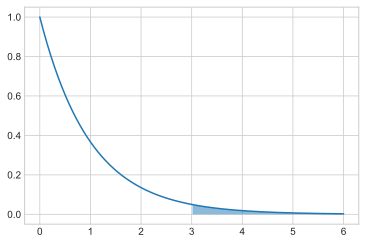

In [15]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

#### Значение статистики попало в критическую область, следовательно отличие роста среди хоккеистов является значимым

Проверим значимость гипотизы отличия BMI

In [16]:
y_1 = df[df["country"] == "FIN"]["bmi"]
y_2 = df[df["country"] == "NOR"]["bmi"]
y_3 = df[df["country"] == "DEN"]["bmi"]

In [17]:
stats.f_oneway(y_1, y_2, y_3)

F_onewayResult(statistic=8.682513420531995, pvalue=0.00020108587146857798)

#### Значение статистики попало в критическую область, следовательно отличие BMI среди хоккеистов является значимым